# Feature Engineering 

## Identifying areas for feature engineering
Take an exploratory look at the volunteer dataset, using the variable of that name. Which of the following columns would you want to perform a feature engineering task on?

### init: 1 dataframe

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(volunteer)
tobedownloaded="{pandas.core.frame.DataFrame: {'volunteer.csv': 'https://file.io/1asy46'}}"
prefix='data_from_datacamp/Chap3-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"volunteer.csv": "https://file.io/1asy46"}}
{'pandas.core.frame.DataFrame': {'volunteer.csv': 'https://file.io/1asy46'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  315k    0  315k    0     0   265k      0 --:--:--  0:00:01 --:--:--  265k


In [2]:
import pandas as pd
volunteer=pd.read_csv(prefix+'volunteer.csv',index_col=0)

### code

In [3]:
volunteer.columns

Index(['opportunity_id', 'content_id', 'vol_requests', 'event_time', 'title',
       'hits', 'summary', 'is_priority', 'category_id', 'category_desc',
       'amsl', 'amsl_unit', 'org_title', 'org_content_id', 'addresses_count',
       'locality', 'region', 'postalcode', 'primary_loc', 'display_url',
       'recurrence_type', 'hours', 'created_date', 'last_modified_date',
       'start_date_date', 'end_date_date', 'status', 'Latitude', 'Longitude',
       'Community Board', 'Community Council ', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

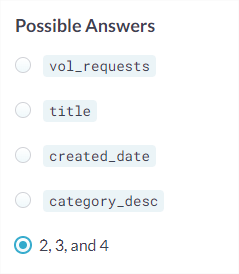

# Encoding categorical variables


## Encoding categorical variables - binary
Take a look at the hiking dataset. There are several columns here that need encoding, one of which is the Accessible column, which needs to be encoded in order to be modeled. Accessible is a binary feature, so it has two values - either Y or N - so it needs to be encoded into 1s and 0s. Use scikit-learn's LabelEncoder method to do that transformation.

### init: 1 dataframe, LabelEncoder

In [4]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(hiking)
tobedownloaded="{pandas.core.frame.DataFrame: {'hiking.csv': 'https://file.io/1thD07'}}"
prefix='data_from_datacamp/Chap3-Exercise2.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"hiking.csv": "https://file.io/1thD07"}}
{'pandas.core.frame.DataFrame': {'hiking.csv': 'https://file.io/1thD07'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12201    0 12201    0     0  15483      0 --:--:-- --:--:-- --:--:-- 15483


In [5]:
import pandas as pd
hiking=pd.read_csv(prefix+'hiking.csv',index_col=0)

In [6]:
from sklearn.preprocessing import LabelEncoder

### code

- Store LabelEncoder() in a variable named enc
- Using the encoder's fit_transform() function, encode the hiking dataset's "Accessible" column. Call the new column Accessible_enc.
- Compare the two columns side-by-side to see the encoding.

In [7]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking['Accessible_enc'] = enc.fit_transform(hiking['Accessible'])

# Compare the two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0


## Encoding categorical variables - one-hot
One of the columns in the volunteer dataset, category_desc, gives category descriptions for the volunteer opportunities listed. Because it is a categorical variable with more than two categories, we need to use one-hot encoding to transform this column numerically. Use Pandas' get_dummies() function to do so.

In [9]:
import pandas as pd

In [11]:
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer['category_desc'])

# Take a look at the encoded columns
print(category_enc.head())

   Education  Emergency Preparedness  Environment  Health  \
0          0                       0            0       0   
1          0                       0            0       0   
2          0                       0            0       0   
3          0                       0            0       0   
4          0                       0            1       0   

   Helping Neighbors in Need  Strengthening Communities  
0                          0                          0  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          0  


# Engineering numerical features


## Engineering numerical features - taking an average
A good use case for taking an aggregate statistic to create a new feature is to take the mean of columns. Here, you have a DataFrame of running times named running_times_5k. For each name in the dataset, take the mean of their 5 run times.

### init: 1 dataframe

In [12]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(running_times_5k)
tobedownloaded="{pandas.core.frame.DataFrame: {'running_times_5k.csv': 'https://file.io/D7FU7c'}}"
prefix='data_from_datacamp/Chap3-Exercise3.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"running_times_5k.csv": "https://file.io/D7FU7c"}}
{'pandas.core.frame.DataFrame': {'running_times_5k.csv': 'https://file.io/D7FU7c'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   226    0   226    0     0    448      0 --:--:-- --:--:-- --:--:--   449


In [13]:
import pandas as pd
running_times_5k=pd.read_csv(prefix+'running_times_5k.csv',index_col=0)

### code

- Create a list of the columns you want to take the average of and store it in a variable named run_columns.
- Use apply to take the mean() of the list of columns and remember to set axis=1. Use lambda row: in the apply.
- Print out the DataFrame to see the mean column.

In [22]:
# Create a list of the columns to average
run_columns = [name for name in running_times_5k.columns][1:]

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)

      name  run1  run2  run3  run4  run5   mean
0      Sue  20.1  18.5  19.6  20.3  18.3  19.36
1     Mark  16.5  17.1  16.9  17.6  17.3  17.08
2     Sean  23.5  25.1  25.2  24.6  23.9  24.46
3     Erin  21.7  21.1  20.9  22.1  22.2  21.60
4    Jenny  25.8  27.1  26.1  26.7  26.9  26.52
5  Russell  30.9  29.6  31.4  30.4  29.9  30.44


## Engineering numerical features - datetime
There are several columns in the volunteer dataset comprised of datetimes. Let's take a look at the start_date_date column and extract just the month to use as a feature for modeling.

In [24]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 664
Data columns (total 35 columns):
opportunity_id        665 non-null int64
content_id            665 non-null int64
vol_requests          665 non-null int64
event_time            665 non-null int64
title                 665 non-null object
hits                  665 non-null int64
summary               665 non-null object
is_priority           62 non-null object
category_id           617 non-null float64
category_desc         617 non-null object
amsl                  0 non-null float64
amsl_unit             0 non-null float64
org_title             665 non-null object
org_content_id        665 non-null int64
addresses_count       665 non-null int64
locality              595 non-null object
region                665 non-null object
postalcode            659 non-null float64
primary_loc           0 non-null float64
display_url           665 non-null object
recurrence_type       665 non-null object
hours                 

In [25]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer.apply(lambda row: row["start_date_converted"].month, axis=1)

# Take a look at the converted and new month columns
print(volunteer[["start_date_converted", "start_date_month"]].head())

  start_date_converted  start_date_month
0           2011-07-30                 7
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2


# Text classification


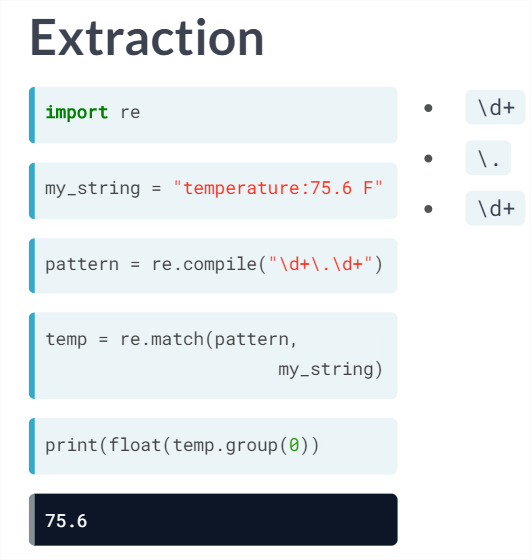

## Engineering features from strings - extraction
The Length column in the hiking dataset is a column of strings, but contained in the column is the mileage for the hike. We're going to extract this mileage using regular expressions, and then use a lambda in Pandas to apply the extraction to the DataFrame.

### init:  1 dataframe, re

In [27]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(hiking)
tobedownloaded="{pandas.core.frame.DataFrame: {'hiking.csv': 'https://file.io/j6nij1'}}"
prefix='data_from_datacamp/Chap3-Exercise4.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"hiking.csv": "https://file.io/j6nij1"}}
{'pandas.core.frame.DataFrame': {'hiking.csv': 'https://file.io/j6nij1'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10408    0 10408    0     0  11590      0 --:--:-- --:--:-- --:--:-- 11603


In [28]:
import pandas as pd
hiking=pd.read_csv(prefix+'hiking.csv',index_col=0)

In [29]:
import re

### code

- Create a pattern that will extract numbers and decimals from text, using \d+ to get numbers and \. to get decimals, and pass it into re's compile function.
- Use re's match function to search the text, passing in the pattern and the length text.
- Use the matched mile's group() attribute to extract the matched pattern, making sure to match group 0, and pass it into float.
- Apply the return_mileage() function to the hiking["Length"] column.

In [31]:
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")
    
    # Search the text for matches
    mile = re.match(pattern, length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking.apply(lambda row: return_mileage(row['Length']), axis=1)
print(hiking[["Length", "Length_num"]].head())

       Length  Length_num
0   0.8 miles        0.80
1    1.0 mile        1.00
2  0.75 miles        0.75
3   0.5 miles        0.50
4   0.5 miles        0.50


## Engineering features from strings - tf/idf
Let's transform the volunteer dataset's title column into a text vector, to use in a prediction task in the next exercise.

### init: 1 dataframe, TfidfVectorizer

In [33]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(volunteer)
tobedownloaded="{pandas.core.frame.DataFrame: {'volunteer.csv': 'https://file.io/RyvBlO'}}"
prefix='data_from_datacamp/Chap3-Exercise4.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"volunteer.csv": "https://file.io/RyvBlO"}}
{'pandas.core.frame.DataFrame': {'volunteer.csv': 'https://file.io/RyvBlO'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  315k    0  315k    0     0   328k      0 --:--:-- --:--:-- --:--:--  329k


In [34]:
import pandas as pd
volunteer=pd.read_csv(prefix+'volunteer.csv',index_col=0)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

### code

- Store the volunteer["title"] column in a variable named title_text.
- Use the tfidf_vec vectorizer's fit_transform() function on title_text to transform the text into a tf-idf vector.

In [36]:
# Take the title text
title_text = volunteer['title']

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

## Text classification using tf/idf vectors
Now that we've encoded the volunteer dataset's title column into tf/idf vectors, let's use those vectors to try to predict the category_desc column.

- Using train_test_split, split the text_tfidf vector, along with your y variable, into training and test sets. Set the stratify parameter equal to y, since the class distribution is uneven. Notice that we have to run the toarray() method on the tf/idf vector, in order to get in it the proper format for scikit-learn.
- Use Naive Bayes' fit() method on the X_train and y_train variables.
- Print out the score() of the X_test and y_test variables.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [40]:
# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

ValueError: Input contains NaN